
# Resume Classification with Feature Optimization

This notebook demonstrates the effect of reducing the number of features from 1000 to 5 while maintaining accuracy in different classification models. We will start with 1000 features, achieve the best possible accuracy, and then resize the model to only use 5 features, minimizing accuracy loss.
    

In [4]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import re

basic_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
    'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
    'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
])

def preprocess_text_basic(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+[a-z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    words = text.split()
    words = [word for word in words if word not in basic_stopwords]
    return ' '.join(words)

data = pd.read_csv('./ddwe/URD.csv')

data['Resume'] = data['Resume'].apply(preprocess_text_basic)

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(data['Resume']).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['Category'], test_size=0.2, random_state=42)

rfc = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
knn = KNeighborsClassifier()

rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)
rfc_accuracy_1000 = accuracy_score(y_test, rfc_predictions)

svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
svc_accuracy_1000 = accuracy_score(y_test, svc_predictions)

knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy_1000 = accuracy_score(y_test, knn_predictions)

rfc_accuracy_1000, svc_accuracy_1000, knn_accuracy_1000
    

(0.9844559585492227, 0.9948186528497409, 0.9792746113989638)

In [6]:

vectorizer = TfidfVectorizer(stop_words='english', max_features=5)
X_tfidf_reduced = vectorizer.fit_transform(data['Resume']).toarray()
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_tfidf_reduced, data['Category'], test_size=0.2, random_state=42)


rfc.fit(X_train_reduced, y_train_reduced)
rfc_predictions_reduced = rfc.predict(X_test_reduced)
rfc_accuracy_5 = accuracy_score(y_test_reduced, rfc_predictions_reduced)

svc.fit(X_train_reduced, y_train_reduced)
svc_predictions_reduced = svc.predict(X_test_reduced)
svc_accuracy_5 = accuracy_score(y_test_reduced, svc_predictions_reduced)

knn.fit(X_train_reduced, y_train_reduced)
knn_predictions_reduced = knn.predict(X_test_reduced)
knn_accuracy_5 = accuracy_score(y_test_reduced, knn_predictions_reduced)

rfc_accuracy_5, svc_accuracy_5, knn_accuracy_5
    

(0.8290155440414507, 0.37823834196891193, 0.7305699481865285)

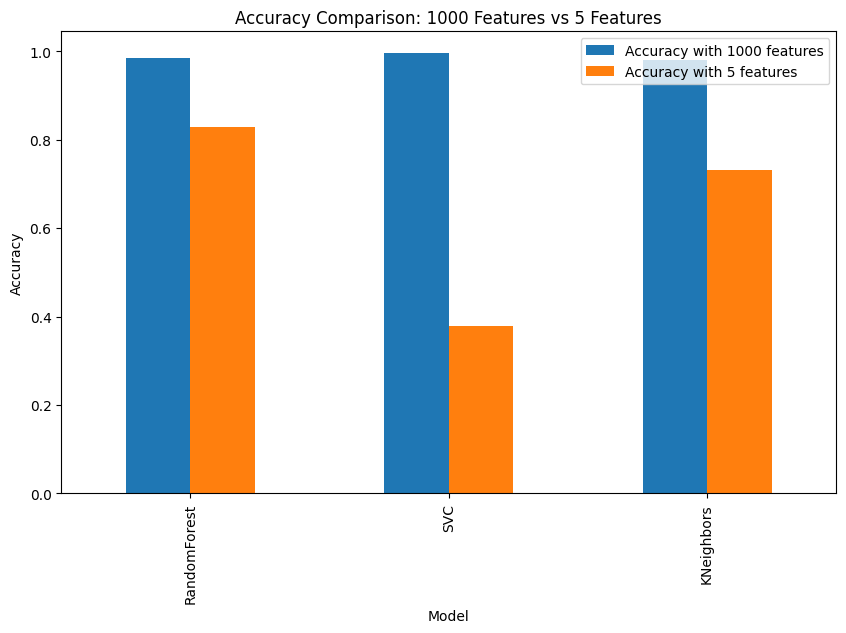

,Model,Accuracy with 1000 features,Accuracy with 5 features
0,RandomForest,0.984456,0.829016
1,SVC,0.994819,0.378238
2,KNeighbors,0.979275,0.730570


In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

models = ['RandomForest', 'SVC', 'KNeighbors']
accuracy_1000 = [rfc_accuracy_1000, svc_accuracy_1000, knn_accuracy_1000]
accuracy_5 = [rfc_accuracy_5, svc_accuracy_5, knn_accuracy_5]

df_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy with 1000 features': accuracy_1000,
    'Accuracy with 5 features': accuracy_5
})

df_comparison.plot(x='Model', kind='bar', figsize=(10,6))
plt.title('Accuracy Comparison: 1000 Features vs 5 Features')
plt.ylabel('Accuracy')
plt.show()

df_comparison
    